# Principles of Machine Learning: Python Edition - Final Exam

This project is based on Principles of Machine Learning: Python Edition course provided by Microsoft through the edx.com service. The purpose of my work is to answer the questions of the final exam of the course with the precise explanation of my methods implemented in this project which I have learned following the content of the course and also using other resources. 

## Data Exploration

First things first, it's important to import missing packages which are crucial for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

### Average Month Spend

In Exercise 1, 2, 3 and 4 we need to find out where we can check minimum, maximum, median and mean  amount of money the customer spends with Adventure Works Cycles on average each month.

Firstly, We need to import csv file (AW_AveMonthSpend.csv) before exploring the mertrics of the data. 

In [2]:
avs = pd.read_csv('/Users/szymonduranowski/Downloads/FinalExam/AW_AveMonthSpend.csv')

In [3]:
avs.describe()

,CustomerID,AveMonthSpend
count,16519.000000,16519.000000
mean,20234.225195,72.405957
std,5342.515987,27.285370
min,11000.000000,22.000000
25%,15604.500000,52.000000
50%,20221.000000,68.000000
75%,24860.500000,84.000000
max,29482.000000,176.000000


Describe() function shows a set of descriptive statistics every variable from each columns. The minimum amount of money the customer spends is 22. The maximum is 176, mean is 72.41 and median equals 68.

For Exercise 5 we need to calculate standard deviation by ourselves. To calculate it we use std() function.

In [4]:
avs[['AveMonthSpend']].std()

AveMonthSpend    27.28537
dtype: float64

### Bike Buyer 

Now, it's time indicate and compare the number of the customers who bought and not bought any bike. Let's find out how many columns dataset includes and which one is the right one.

In [5]:
bb = pd.read_csv('/Users/szymonduranowski/Downloads/FinalExam/AW_BikeBuyer.csv')
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID    16519 non-null int64
BikeBuyer     16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


We already know it is the column with BikeBuyer label.

In [6]:
bb.BikeBuyer.value_counts()

0    11030
1     5489
Name: BikeBuyer, dtype: int64

By using value_counts() function on BikeBuyer column it is possible to see amount of people who bought bikes = 1 and who did not = 0. There are two times more people who bought bike than those who did not and this is the answer for the Excercise 6.

### Customer demographic data

In Excercise 7 we need to select the correct order (from the lowest to the highest) that ranks the median YearlyIncome by Occupation.

In [7]:
awc = pd.read_csv('/Users/szymonduranowski/Downloads/FinalExam/AdvWorksCusts.csv')
awc.shape

(16519, 23)

In [8]:
awc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

The customer sales data includes 23 columns and 16519 variables, therefore we have a dataset with an extented amount of feateures in comparison to the previous tables. Amongst 23 columns there are YearlyIncome and Occupation. We calculate the median of the variables and then create a barplot to visualize the results.

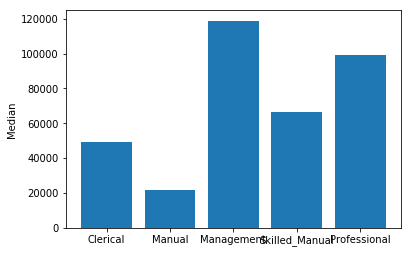

In [9]:
clerical_awc = awc.loc[(awc.Occupation == 'Clerical')]
manual_awc = awc.loc[(awc.Occupation == 'Manual')]
management_awc = awc.loc[(awc.Occupation == 'Management')]
skilledm_awc = awc.loc[(awc.Occupation == 'Skilled Manual')]
professional_awc = awc.loc[(awc.Occupation == 'Professional')]

Occupation = ["Clerical", "Manual", "Management", "Skilled_Manual", "Professional"]
Median = [np.median(clerical_awc.YearlyIncome), np.median(manual_awc.YearlyIncome), 
            np.median(management_awc.YearlyIncome), np.median(skilledm_awc.YearlyIncome), 
            np.median(professional_awc.YearlyIncome)]

median_occupation = pd.DataFrame(columns=[Occupation, Median])
median_occupation


plt.bar(Occupation, Median, align='center')
plt.ylabel('Median')
plt.rcParams["figure.figsize"] = [12.8, 9.6]

The barplot shows us median of yearly income by occupation. It seems that people earn more as management, professional and skilled manual workers. The lowest paid are clerical and manual workers. 

A group of customers based on age and gender with the highest AveMonthSpend values is the answer for the Excercise 8. As a first step we need to concatenate two datesets(AdvWorksCusts and AveMonthSpend) into one dataset.

In [10]:
awc_avs = pd.merge(awc, avs, on='CustomerID')
awc_avs.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


As another step we use similar method just like in previous exercise.

In [11]:
awc_avs['BirthDate'].head()

0    1966-04-08
1    1965-05-14
2    1965-08-12
3    1968-02-15
4    1968-08-08
Name: BirthDate, dtype: object

Text(0, 0.5, 'AveMonthSpend')

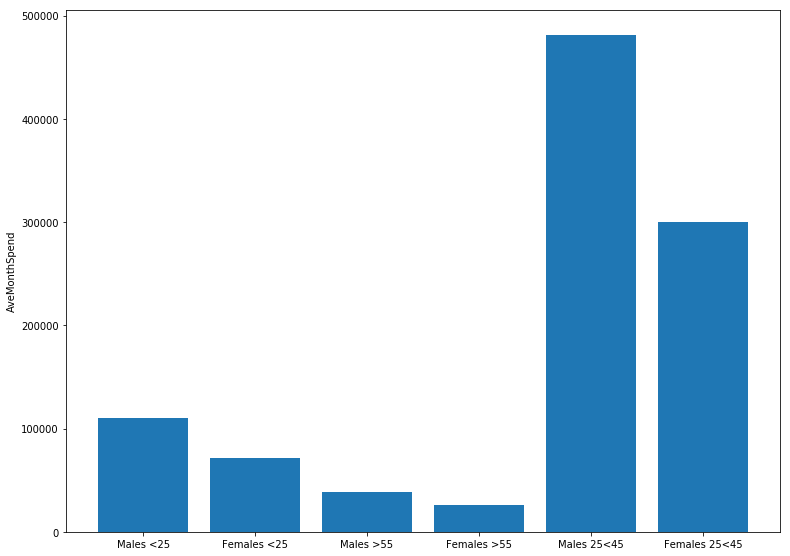

In [12]:
awc_avs[['BirthDate']] = awc_avs[['BirthDate']].astype('datetime64[ns]')
under25 = awc_avs[( awc_avs['BirthDate'] >= '1973-01-01' )]
over55 = awc_avs[(awc_avs['BirthDate'] <= '1943-01-01')]
between25and45 = awc_avs[(awc_avs['BirthDate'] <= '1973-01-01') & (awc_avs['BirthDate'] >= '1953-01-01')]

m_under25 = under25[(under25['Gender'] == 'M' )]
f_under25 = under25[(under25.Gender == 'F' )]
m_over55 = over55[(over55.Gender == 'M' )]
f_over55 = over55[(over55.Gender == 'F' )]
m_between25and45 = between25and45[(between25and45.Gender == 'M' )]
f_between25and45 = between25and45[(between25and45.Gender == 'F' )]

Customers = ['Males <25', 'Females <25', 'Males >55',
               'Females >55', 'Males 25<45', 'Females 25<45']

AveMonthSpend = [sum(m_under25['AveMonthSpend']), sum(f_under25['AveMonthSpend']), sum(m_over55['AveMonthSpend']),
                sum(f_over55['AveMonthSpend']), sum(m_between25and45['AveMonthSpend']), 
                 sum(f_between25and45['AveMonthSpend'])]

Customers_AveMonthSpend = pd.DataFrame(columns=[Customers, AveMonthSpend])
Customers_AveMonthSpend

plt.bar(Customers, AveMonthSpend, align='center')
plt.ylabel('AveMonthSpend')


It is clearly shown that males between 25 and 45 are the group which accounts for the highest AveMonthSpend.

In Exercise 9 we need to check if the followings below are true or false:
    a) Married customers have a higher median AvgMonthSpend than single customers,
    b) Customers with no car have a higher median AvgMonthSpend than customers with three or more cars,
    c) Male customers have a higher median AvgMonthSpend than female customers,
    d) Female customers have a wider range of AvgMonthSpend values than male customers,
    e) Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

Text(0, 0.5, 'Median_of_AveMonthSpend')

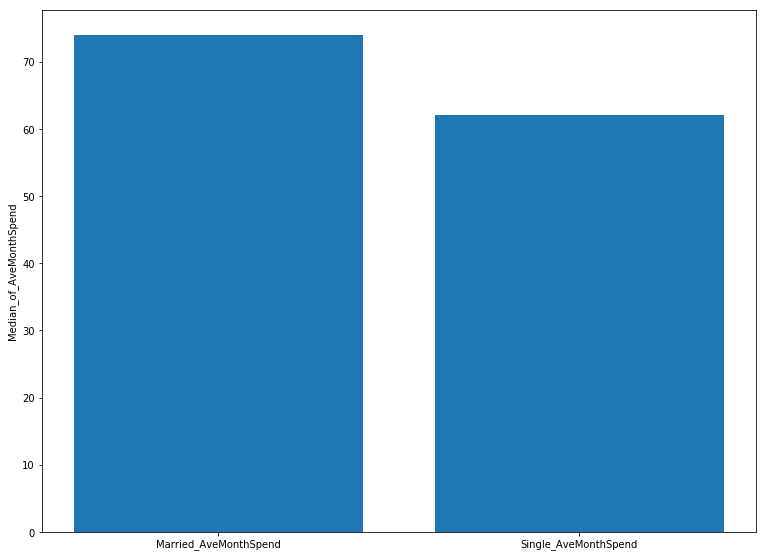

In [13]:
married_customers = awc_avs[awc_avs['MaritalStatus'] == 'M' ]
single_customers = awc_avs[awc_avs['MaritalStatus'] == 'S' ]

Customers = ['Married_AveMonthSpend', 'Single_AveMonthSpend']
Median_of_AveMonthSpend = [np.median(married_customers['AveMonthSpend']), 
                            np.median(single_customers['AveMonthSpend'])]
                            
plt.bar(Customers, Median_of_AveMonthSpend, align='center')
plt.ylabel('Median_of_AveMonthSpend')

a) Married customers have a higher median AvgMonthSpend than single customers - that is definately true.

Text(0, 0.5, 'Median_of_customers_AveMonthSpend')

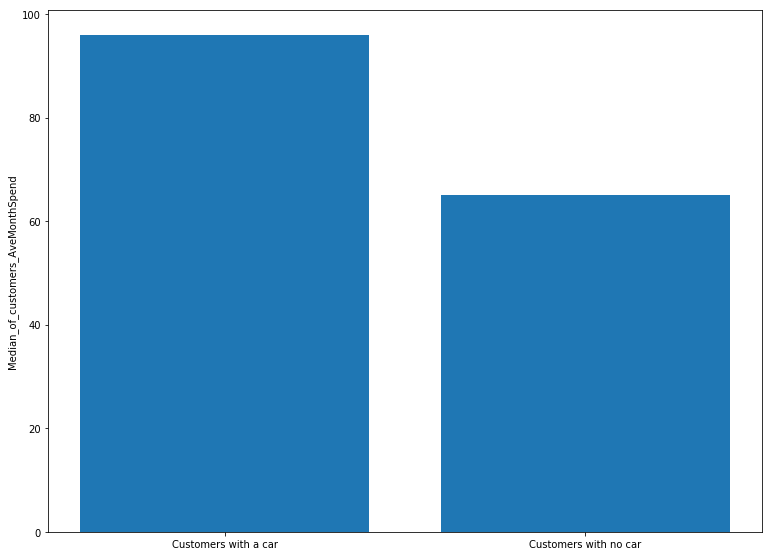

In [14]:
customers_with_no_car = awc_avs[awc_avs['NumberCarsOwned'] == 0]
customers_with_a_car = awc_avs[awc_avs['NumberCarsOwned'] >= 3]

Customers = ['Customers with a car', 'Customers with no car']
Median_of_customers_AveMonthSpend = [np.median(customers_with_a_car['AveMonthSpend']), 
                                       np.median(customers_with_no_car['AveMonthSpend'])]

plt.bar(Customers, Median_of_customers_AveMonthSpend, align='center')
plt.ylabel('Median_of_customers_AveMonthSpend')

b) Customers with no car have a higher median AvgMonthSpend than customers with three or more cars - false.

Text(0, 0.5, 'Median_of_males_and_females_AveMonthSpend')

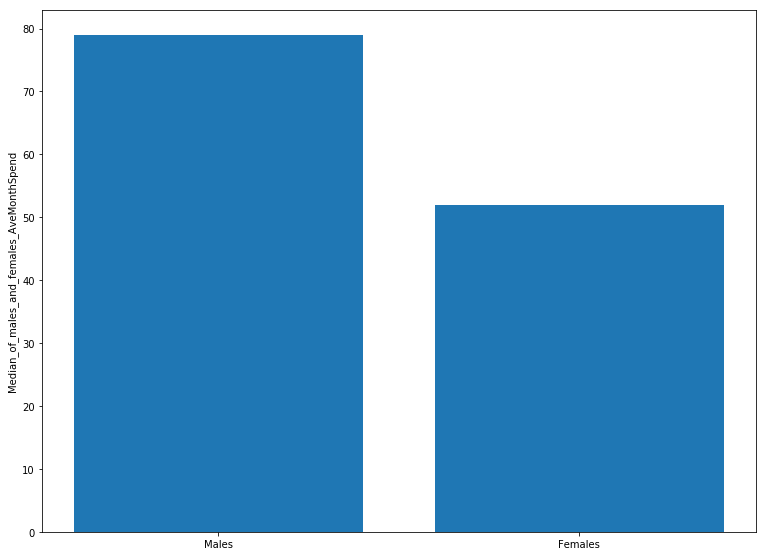

In [15]:
male_customers = awc_avs[awc_avs['Gender'] == 'M' ]
female_customers = awc_avs[awc_avs['Gender'] == 'F' ]

Customers = ['Males', 'Females']
Median_of_males_and_females_AveMonthSpend = [np.median(male_customers['AveMonthSpend']), 
                                               np.median(female_customers['AveMonthSpend'])]

plt.bar(Customers, Median_of_males_and_females_AveMonthSpend, align='center')
plt.ylabel('Median_of_males_and_females_AveMonthSpend')

c) Male customers have a higher median AvgMonthSpend than female customers - yes, that is true.

,0
8473,Males
8276,Females


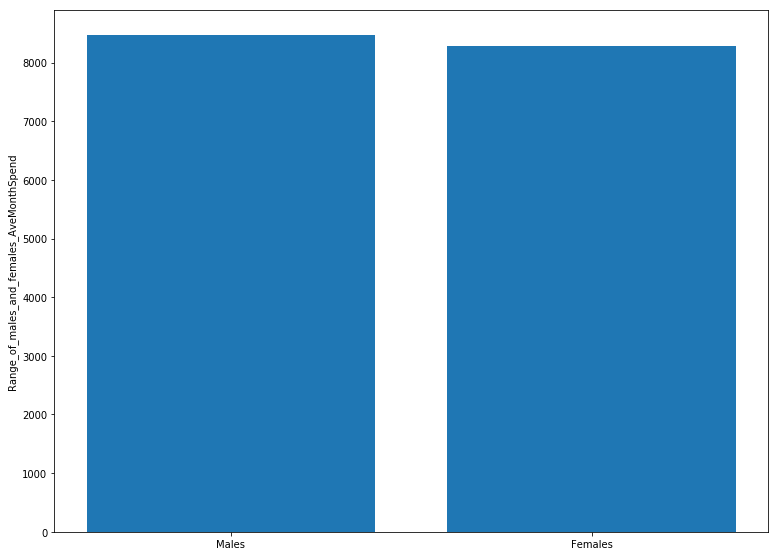

In [16]:
male_customers = awc_avs[awc_avs['Gender'] == 'M' ]
female_customers = awc_avs[awc_avs['Gender'] == 'F' ]

Customers = ['Males', 'Females']
Range_of_males_and_females_AveMonthSpend = [len(male_customers), len(female_customers)]

plt.bar(Customers, Range_of_males_and_females_AveMonthSpend, align='center')
plt.ylabel('Range_of_males_and_females_AveMonthSpend')

pd.DataFrame(Customers, Range_of_males_and_females_AveMonthSpend)

d) Female customers have a wider range of AvgMonthSpend values than male customers - false, Males columns have slightly wider range.

Text(0, 0.5, 'Median_of_customers_AveMonthSpend')

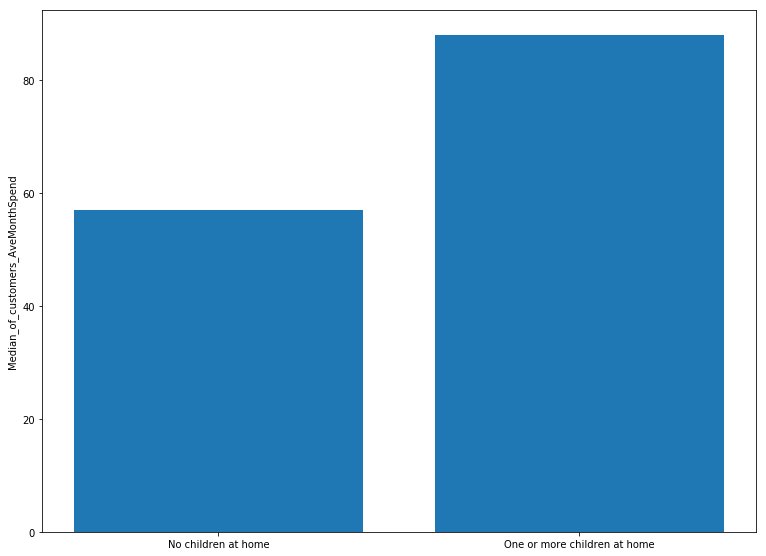

In [17]:
customers_with_no_children_at_home = awc_avs[awc_avs['NumberChildrenAtHome'] == 0]
customers_with_any_children_at_home = awc_avs[awc_avs['NumberChildrenAtHome'] > 0]

Customers = ['No children at home', 'One or more children at home']
Median_of_customers_AveMonthSpend = [np.median(customers_with_no_children_at_home['AveMonthSpend']), 
                                    np.median(customers_with_any_children_at_home['AveMonthSpend'])]

plt.bar(Customers, Median_of_customers_AveMonthSpend, align='center')
plt.ylabel('Median_of_customers_AveMonthSpend')

e) Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home - yes, that's correct answer.

Exercise 10 is the last one of Data Exploration section.
    a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't,
    b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't,
    c) The most common occupation type for customers who bought a bike is skilled manual,
    d) Male customers are more likely to buy bikes than female customers,
    e) A maried customer is more likely to buy a bike,
This time we concatenate datasets altogether. 

In [18]:
awc_avs_bb = pd.merge(awc_avs, bb, on="CustomerID")
awc_avs_bb.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


Text(0, 0.5, 'Median_of_customers_YearlyIncome')

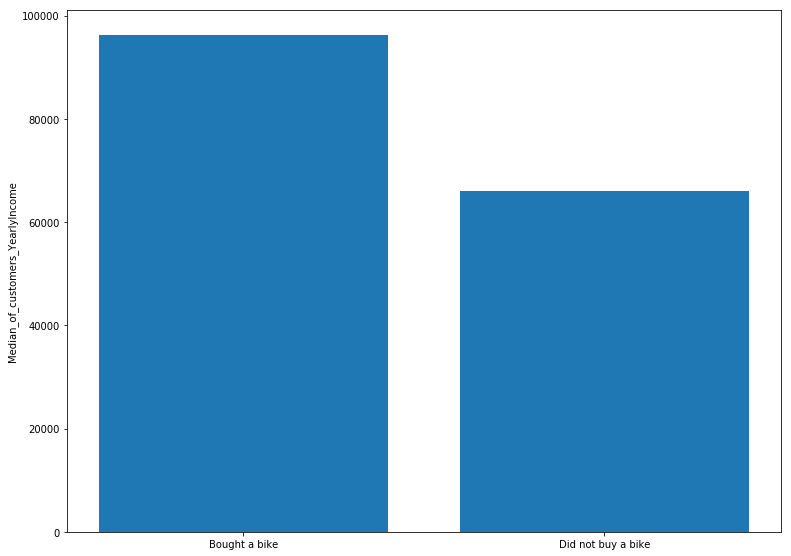

In [19]:
bikebuyer_yes = awc_avs_bb[awc_avs_bb['BikeBuyer'] > 0]
bikebuyer_no = awc_avs_bb[awc_avs_bb['BikeBuyer'] == 0]

Customers = ['Bought a bike', 'Did not buy a bike']
Median_of_customers_YearlyIncome = [np.median(bikebuyer_yes['YearlyIncome']), 
                                    np.median(bikebuyer_no['YearlyIncome'])]

plt.bar(Customers, Median_of_customers_YearlyIncome, align='center')
plt.ylabel('Median_of_customers_YearlyIncome')

a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't - correct answer.

Text(0, 0.5, 'Median_of_bought_cars')

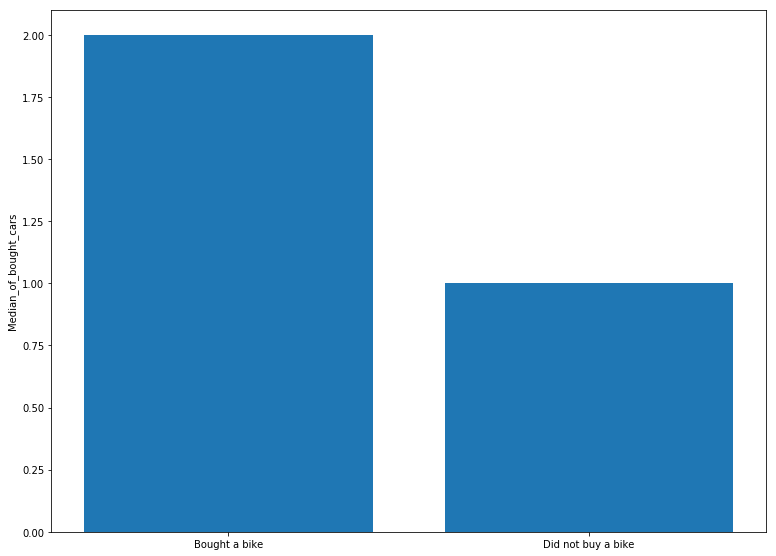

In [20]:
carowners_bikebuyers_yes = bikebuyer_yes[bikebuyer_yes['NumberCarsOwned'] >= 0]
carowners_bikebuyers_no = bikebuyer_no[bikebuyer_no['NumberCarsOwned'] >= 0]

Customers = ['Bought a bike', 'Did not buy a bike']
Median_of_bought_cars = [np.median(bikebuyer_yes['NumberCarsOwned']), 
                        np.median(bikebuyer_no['NumberCarsOwned'])]

plt.bar(Customers, Median_of_bought_cars, align='center')
plt.ylabel('Median_of_bought_cars')

b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't - false

Text(0, 0.5, 'Customers_who_bought_a_bike')

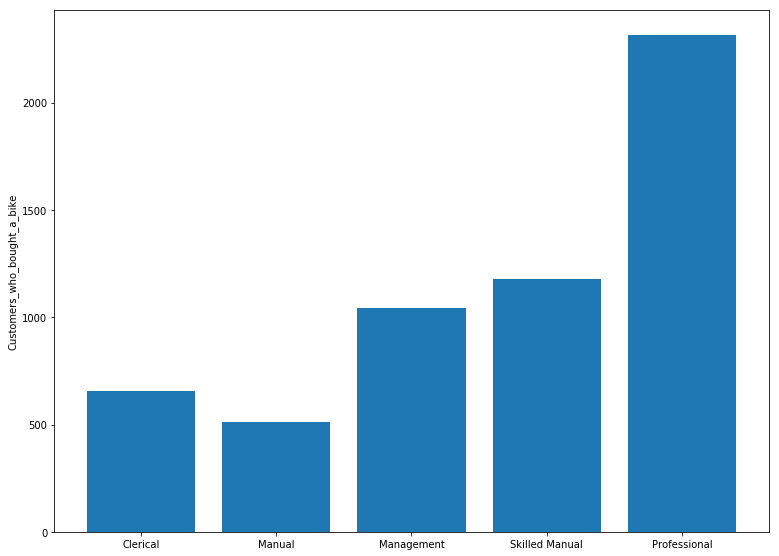

In [21]:
professional_awc_avs_bb = awc_avs_bb[awc_avs_bb['Occupation'] == 'Professional']
clerical_awc_avs_bb = awc_avs_bb[awc_avs_bb['Occupation'] == 'Clerical']
manual_awc_avs_bb = awc_avs_bb[awc_avs_bb['Occupation'] == 'Manual']
management_awc_avs_bb = awc_avs_bb[awc_avs_bb['Occupation'] == 'Management']
skilledm_awc_avs_bb = awc_avs_bb[awc_avs_bb['Occupation'] == 'Skilled Manual']

Occupation = ['Clerical', 'Manual', 'Management', 'Skilled Manual', 'Professional']
Customers_who_bought_a_bike = [sum(clerical_awc_avs_bb['BikeBuyer']), 
                             sum(manual_awc_avs_bb['BikeBuyer']), 
                             sum(management_awc_avs_bb['BikeBuyer']),
                             sum(skilledm_awc_avs_bb['BikeBuyer']),
                             sum(professional_awc_avs_bb['BikeBuyer'])]

plt.bar(Occupation, Customers_who_bought_a_bike, align='center')
plt.ylabel('Customers_who_bought_a_bike')

c) The most common occupation type for customers who bought a bike is skilled manual - false, professional is the most common occupation type.

Text(0, 0.5, 'Bike_buyers')

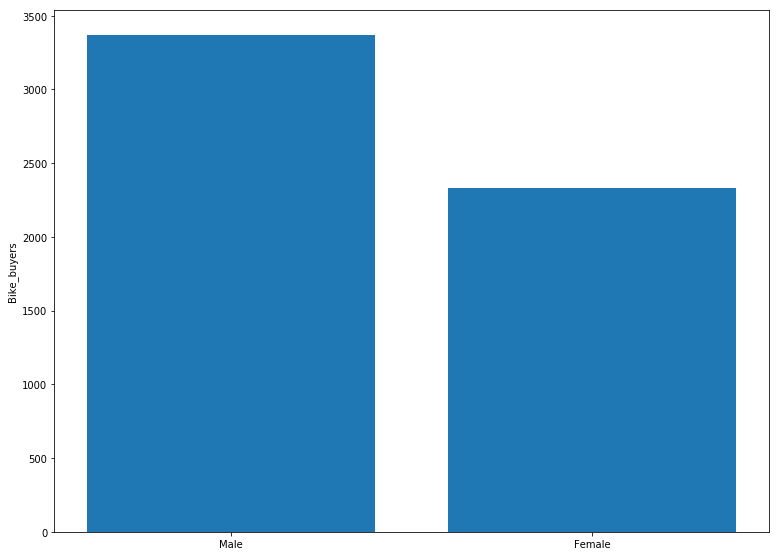

In [22]:
male_bikebuyers = awc_avs_bb[awc_avs_bb['Gender'] == 'M']
female_bikebuyers = awc_avs_bb[awc_avs_bb['Gender'] == 'F']

Customers = ['Male', 'Female']
Bike_buyers = [sum(male_bikebuyers['BikeBuyer']), 
                sum(female_bikebuyers['BikeBuyer'])]

plt.bar(Customers, Bike_buyers, align='center')
plt.ylabel('Bike_buyers')

d) Male customers are more likely to buy bikes than female customers - correct.

Text(0, 0.5, 'Bike_buyers')

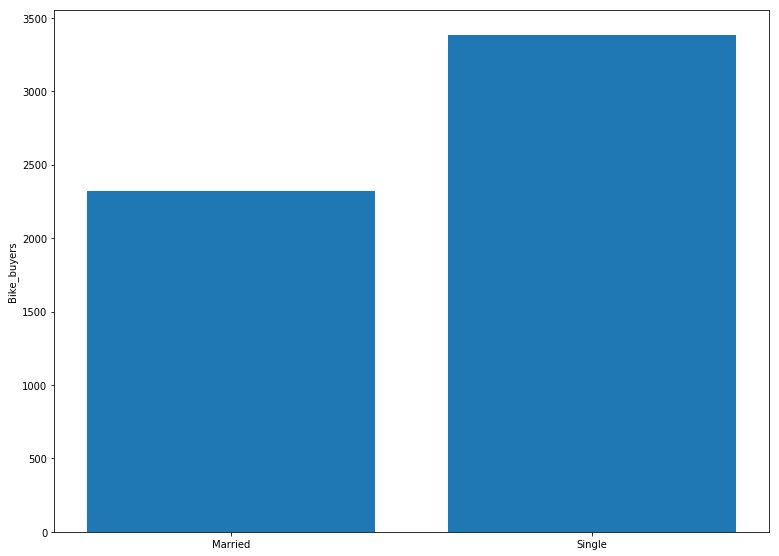

In [23]:
married_bikebuyers = awc_avs_bb[awc_avs_bb['MaritalStatus'] == 'M']
single_bikebuyers = awc_avs_bb[awc_avs_bb['MaritalStatus'] == 'S']

Customers = ['Married', 'Single']
Bike_buyers = [sum(married_bikebuyers['BikeBuyer']), 
                sum(single_bikebuyers['BikeBuyer'])]

plt.bar(Customers, Bike_buyers, align='center')
plt.ylabel('Bike_buyers')

e) A maried customer is more likely to buy a bike - that's not true

## Classification

In this section we create a classifcation model. The purpose of the model is to predict whether customer will purchase a bike or not. Firstly, we need to import the test data for the prediction.

In [24]:
aw_test = pd.read_csv('/Users/szymonduranowski/Downloads/AW_test.csv')
aw_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [25]:
aw_test.shape

(500, 23)

Now the test data has been imported. Test data doesn't include AveMonthSpend and Bike Buyer columns. Therefore, we will get rid of that column form awc_avs_bb data, because  it won't be neccessary anymore.

In [26]:
awc_avs_bb.drop(columns='AveMonthSpend')

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,Bachelors,Professional,M,S,1,1,0,0,103199,1
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,Bachelors,Professional,F,S,1,1,0,0,84756,1
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,Bachelors,Professional,M,M,1,2,3,3,109759,1
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,Bachelors,Professional,F,S,1,3,4,4,88005,1
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,Bachelors,Professional,M,S,0,1,0,0,106399,0


Now it's time to pepare train and test data for constructing classification model by using sci-kit learn package. The numpy arrays of the label values are also required for the scikit-learn model.

In [27]:
labels = np.array(awc_avs_bb['BikeBuyer'])

In [28]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(categories='auto')
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender', 'Occupation',  
                       'MaritalStatus']

Features = encode_string(awc_avs_bb['Education'])
for col in categorical_columns:
    temp = encode_string(awc_avs_bb[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])  

(17209, 14)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]]


In [29]:
Features = np.concatenate([Features, np.array(awc_avs_bb[['YearlyIncome', 
                            'NumberCarsOwned', 'NumberChildrenAtHome']])], axis = 1)
print(Features.shape)
print(Features[:2, :]) 

(17209, 17)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.37947e+05 0.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.01141e+05 1.00000e+00 3.00000e+00]]


In [30]:
Features_test = encode_string(aw_test['Education'])
for col in categorical_columns:
    temp_test = encode_string(aw_test[col])
    Features_test = np.concatenate([Features_test, temp_test], axis = 1)

print(Features_test.shape)
print(Features_test[:2, :])  

(500, 14)
[[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]]


In [31]:
Features_test = np.concatenate([Features_test, np.array(aw_test[['YearlyIncome', 
                            'NumberCarsOwned', 'NumberChildrenAtHome']])], axis = 1)
print(Features_test.shape)
print(Features_test[:2, :]) 

(500, 17)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 8.69310e+04 2.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00125e+05 2.00000e+00 2.00000e+00]]


In [32]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size=16043)
indx_test = range(Features_test.shape[0])
indx_test = ms.train_test_split(indx_test, test_size=0)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features_test[indx_test[0],:]
y_test = np.ravel(labels[indx_test[0]])

In [33]:
X_train.shape

(1166, 17)

In [34]:
X_test.shape

(500, 17)

In [35]:
scaler = preprocessing.StandardScaler().fit(X_train[:,16:])
X_train[:,16:] = scaler.transform(X_train[:,16:])
X_test[:,16:] = scaler.transform(X_test[:,16:])
X_train[:2,]

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00,  0.0000000e+00,  1.4948900e+05,  3.0000000e+00,
        -6.4456526e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00,
         0.0000000e+00,  1.0000000e+00,  8.6482000e+04,  1.0000000e+00,
        -6.4456526e-01]])

## Construct the logistic regression model

Both train and test data are ready, then it's finally possible to create logisitc regression model.

In [36]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/Users/szymonduranowski/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.02867502]
[[-3.88183830e-03 -4.97634100e-03 -6.93022442e-03 -7.51867619e-03
  -5.36793987e-03 -2.98105903e-02  1.13557053e-03 -1.13830238e-02
  -1.94223174e-03 -1.19744735e-02  4.36760217e-03 -7.74289290e-03
  -3.08549826e-02  2.17996285e-03 -3.68118059e-06 -8.93718150e-03
   7.51200235e-02]]


In [38]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.63171529 0.36828471]
 [0.58823393 0.41176607]
 [0.57350893 0.42649107]
 [0.58287512 0.41712488]
 [0.63339669 0.36660331]
 [0.60373152 0.39626848]
 [0.61289524 0.38710476]
 [0.5881358  0.4118642 ]
 [0.62678448 0.37321552]
 [0.58663452 0.41336548]
 [0.55693081 0.44306919]
 [0.55448003 0.44551997]
 [0.56693554 0.43306446]
 [0.59938844 0.40061156]
 [0.53630375 0.46369625]]


In [39]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 0 1 0 1 0 0]


We've already received all the results of our model. Now it's time for an evaluation of it by computing confusion matrix, accuracy, precision, recall and f1 statistic.

In [40]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       351                 2
Actual negative       146                 1

Accuracy  0.70
 
           Positive      Negative
Num case      353           147
Precision    0.71          0.33
Recall       0.99          0.01
F1           0.83          0.01


The code in the cell below computes and displays the ROC curve and AUC.

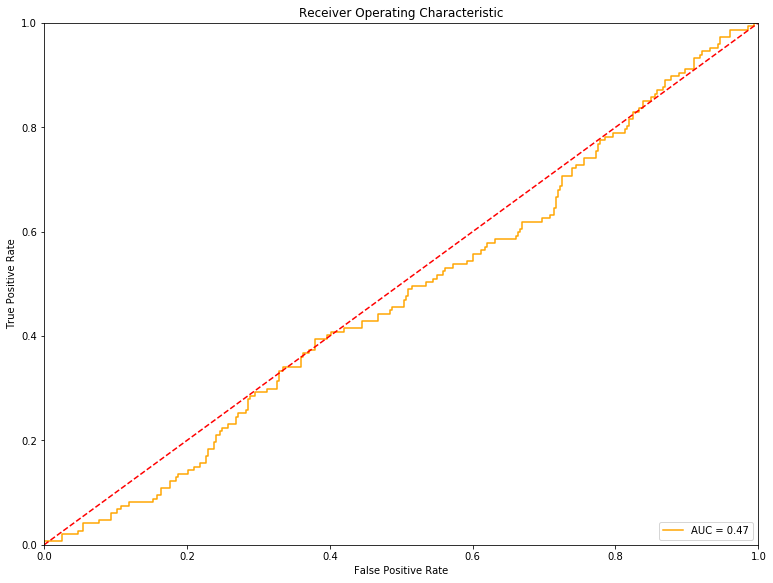

In [41]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities) 

## Regression

With the linear regression model we will predict customer's monthly monthly spend. This model will help to predict average monthly spend for the new customers for whom no information about average monthly spend or previous bike purchases is available.

In this case use the same method to prepare train and test data. The differance is that we are using awc_avs dataset which includes customer data and average month spend of the old customers.

In [42]:
labels = np.array(awc_avs['AveMonthSpend']) 

In [43]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(categories='auto')
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender', 'Occupation',  
                       'MaritalStatus']

Features = encode_string(awc_avs['Education'])
for col in categorical_columns:
    temp = encode_string(awc_avs[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(16749, 14)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]]


In [44]:
Features = np.concatenate([Features, np.array(awc_avs[['YearlyIncome', 
                            'NumberCarsOwned', 'NumberChildrenAtHome']])], axis = 1)
print(Features.shape)
print(Features[:2, :]) 

(16749, 17)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.37947e+05 0.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.01141e+05 1.00000e+00 3.00000e+00]]


In [45]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size=16043)
indx_test = range(Features_test.shape[0])
indx_test = ms.train_test_split(indx_test, test_size=0)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features_test[indx_test[0],:]
y_test = np.ravel(labels[indx_test[0]])

In [46]:
scaler = preprocessing.StandardScaler().fit(X_train[:,16:])
X_train[:,16:] = scaler.transform(X_train[:,16:])
X_test[:,16:] = scaler.transform(X_test[:,16:])
print(X_train.shape)
X_train[:2,]

(706, 17)


array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  8.99960000e+04,
         1.00000000e+00, -6.53017547e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  3.75960000e+04,
         2.00000000e+00, -6.53017547e-01]])

## Construct of the linear regression model

At this moment, we can create our regression model based on our new prepared train and test data. 

In [47]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [48]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 8.39419758e+00  7.09206883e+00  7.64593722e+00  8.17064102e+00
  8.88102673e+00  5.96108944e+00  3.42227819e+01  8.18687896e+00
  5.32947412e+00  8.72422331e+00  8.82180024e+00  9.12149475e+00
  2.28350841e+01  1.73487873e+01  2.13787316e-04 -8.02092775e-01
  1.68923961e+01]


In [49]:
reg_prediction = lin_mod.predict(X_test)

In [50]:
reg_prediction[:15]

array([ 59.94120837,  71.77041571,  38.39450304,  52.28740154,
       105.45625592, 122.21826082,  36.38406293,  82.58534656,
        69.25586511,  86.53903738,  79.90492016,  90.60654037,
        48.36308515, 117.77483081,  82.39797654])

reg_prediction stands for predicted values of average month spends of the new customers for whom no information about average monthly spend or previous bike purchases is available.

Ultimately, we can evaluate our results by computing metrics in a cell below. 

In [51]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 1556.7504475512567
Root Mean Square Error = 39.45567700029055
Mean Absolute Error    = 30.985396865300544
Median Absolute Error  = 26.690418818058216
R^2                    = -0.9003852640462298
Adjusted R^2           = -1.00909374313362
